In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data preprocessing

In [5]:
train.drop('PassengerId', axis = 1, inplace = True)
test.drop('PassengerId', axis = 1, inplace = True)

In [6]:
def name_preprocess(col, name_title_list):
    for i in col:
        # print(i)
        temp = i.split()
        for j in temp:
            if '.' in j:
                name_title_list.append(j[:-1])
                break

In [7]:
name_title_train = []
name_title_test = []
name_preprocess(train['Name'], name_title_train)
name_preprocess(test['Name'], name_title_test)

In [8]:
# name_title_test

In [9]:
train["Name_title"] = name_title_train
test["Name_title"] = name_title_test

In [10]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [11]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [12]:
train.drop('Name', axis= 1, inplace= True)
test.drop('Name', axis= 1, inplace= True)

In [13]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [14]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title
0,3,male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,3,female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,2,male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,3,male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,3,female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [15]:
train["Family_size"] = train['Parch'] + train['SibSp']
test["Family_size"] = test['Parch'] + test['SibSp']

In [16]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title,Family_size
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [17]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title,Family_size
0,3,male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0
1,3,female,47.0,1,0,363272,7.0000,NaN,S,Mrs,1
2,2,male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0
3,3,male,27.0,0,0,315154,8.6625,NaN,S,Mr,0
4,3,female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2


In [18]:
train.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Name_title       0
Family_size      0
dtype: int64

In [19]:
test.isnull().sum()

Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Name_title       0
Family_size      0
dtype: int64

In [20]:
test.shape, train.shape

((418, 11), (891, 12))

In [21]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [22]:
train['Cabin_Nan'] = train["Cabin"].isnull()
test['Cabin_Nan'] = test["Cabin"].isnull()

In [23]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title,Family_size,Cabin_Nan
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,True
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,False
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,True
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,False
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,True


In [24]:
train['Cabin'].fillna('Z', axis = 0, inplace = True)
test['Cabin'].fillna('Z', axis = 0, inplace = True)

In [25]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title,Family_size,Cabin_Nan
0,0,3,male,22.0,1,0,A/5 21171,7.2500,Z,S,Mr,1,True
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,False
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,Z,S,Miss,0,True
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,False
4,0,3,male,35.0,0,0,373450,8.0500,Z,S,Mr,0,True


In [26]:
def cabin_preprocess(col, list_cabin):
    for i in col:
        if i == 'Z':
            list_cabin.append(i)
        else:
            list_cabin.append(i[0])

In [27]:
train_cabin = []
test_cabin = []

cabin_preprocess(train['Cabin'], train_cabin)
cabin_preprocess(test['Cabin'], test_cabin)

In [28]:
# train_cabin

In [29]:
train['Cabin'] = train_cabin
test['Cabin'] = test_cabin

In [30]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title,Family_size,Cabin_Nan
0,0,3,male,22.0,1,0,A/5 21171,7.2500,Z,S,Mr,1,True
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,1,False
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,Z,S,Miss,0,True
3,1,1,female,35.0,1,0,113803,53.1000,C,S,Mrs,1,False
4,0,3,male,35.0,0,0,373450,8.0500,Z,S,Mr,0,True


In [31]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title,Family_size,Cabin_Nan
0,3,male,34.5,0,0,330911,7.8292,Z,Q,Mr,0,True
1,3,female,47.0,1,0,363272,7.0000,Z,S,Mrs,1,True
2,2,male,62.0,0,0,240276,9.6875,Z,Q,Mr,0,True
3,3,male,27.0,0,0,315154,8.6625,Z,S,Mr,0,True
4,3,female,22.0,1,1,3101298,12.2875,Z,S,Mrs,2,True


In [32]:
train.drop('Ticket', axis = 1, inplace= True)
test.drop('Ticket', axis = 1, inplace= True)

In [33]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Name_title,Family_size,Cabin_Nan
0,0,3,male,22.0,1,0,7.2500,Z,S,Mr,1,True
1,1,1,female,38.0,1,0,71.2833,C,C,Mrs,1,False
2,1,3,female,26.0,0,0,7.9250,Z,S,Miss,0,True
3,1,1,female,35.0,1,0,53.1000,C,S,Mrs,1,False
4,0,3,male,35.0,0,0,8.0500,Z,S,Mr,0,True


In [34]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Name_title,Family_size,Cabin_Nan
0,3,male,34.5,0,0,7.8292,Z,Q,Mr,0,True
1,3,female,47.0,1,0,7.0000,Z,S,Mrs,1,True
2,2,male,62.0,0,0,9.6875,Z,Q,Mr,0,True
3,3,male,27.0,0,0,8.6625,Z,S,Mr,0,True
4,3,female,22.0,1,1,12.2875,Z,S,Mrs,2,True


In [35]:
train.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         2
Name_title       0
Family_size      0
Cabin_Nan        0
dtype: int64

In [36]:
test.isnull().sum()

Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Cabin           0
Embarked        0
Name_title      0
Family_size     0
Cabin_Nan       0
dtype: int64

In [37]:
train['Age'].median()

28.0

In [38]:
test['Age'].median()

27.0

In [39]:
train['Age'].fillna((28+27)/2, axis = 0, inplace = True)
test['Age'].fillna((28+27)/2, axis = 0, inplace = True)

In [40]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [42]:
train['Embarked'].fillna('S', axis = 0, inplace = True)

In [43]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Name_title     0
Family_size    0
Cabin_Nan      0
dtype: int64

In [44]:
test.isnull().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Cabin          0
Embarked       0
Name_title     0
Family_size    0
Cabin_Nan      0
dtype: int64

In [45]:
test['Fare'].median()

14.4542

In [46]:
train['Fare'].median()

14.4542

In [47]:
test['Fare'].fillna(train['Fare'].median(), axis = 0, inplace = True)

In [48]:
test.isnull().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Name_title     0
Family_size    0
Cabin_Nan      0
dtype: int64

In [49]:
train.nunique()

Survived         2
Pclass           3
Sex              2
Age             89
SibSp            7
Parch            7
Fare           248
Cabin            9
Embarked         3
Name_title      17
Family_size      9
Cabin_Nan        2
dtype: int64

In [50]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Name_title,Family_size,Cabin_Nan
0,0,3,male,22.0,1,0,7.2500,Z,S,Mr,1,True
1,1,1,female,38.0,1,0,71.2833,C,C,Mrs,1,False
2,1,3,female,26.0,0,0,7.9250,Z,S,Miss,0,True
3,1,1,female,35.0,1,0,53.1000,C,S,Mrs,1,False
4,0,3,male,35.0,0,0,8.0500,Z,S,Mr,0,True


In [51]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le_sex = LabelEncoder()
le_emb = LabelEncoder()
le_name = LabelEncoder()
le_cabin_nan = LabelEncoder()
le_cabin = LabelEncoder()

In [54]:
train['Sex'] = le_sex.fit_transform(train['Sex'])
train['Embarked'] = le_emb.fit_transform(train['Embarked'])
train['Name_title'] = le_name.fit_transform(train['Name_title'])
train['Cabin_Nan'] = le_cabin_nan.fit_transform(train['Cabin_Nan'])
train['Cabin'] = le_cabin.fit_transform(train['Cabin'])

In [55]:
test['Sex'] = le_sex.transform(test['Sex'])
test['Embarked'] = le_emb.transform(test['Embarked'])
test['Cabin_Nan'] = le_cabin_nan.transform(test['Cabin_Nan'])
test['Cabin'] = le_cabin.fit_transform(test['Cabin'])

In [56]:
test[test['Name_title'] == 'Dona']

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Name_title,Family_size,Cabin_Nan
414,1,0,39.0,0,0,108.9,2,0,Dona,0,0


In [57]:
test['Name_title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [58]:
new_name = []
for i in test['Name_title']:
    if i == 'Dona':
        new_name.append('Miss')
    else :
        new_name.append(i)

In [59]:
test['Name_title'] = new_name

In [60]:
test['Name_title'] = le_name.transform(test['Name_title'])

In [61]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Name_title,Family_size,Cabin_Nan
0,0,3,1,22.0,1,0,7.2500,8,2,12,1,1
1,1,1,0,38.0,1,0,71.2833,2,0,13,1,0
2,1,3,0,26.0,0,0,7.9250,8,2,9,0,1
3,1,1,0,35.0,1,0,53.1000,2,2,13,1,0
4,0,3,1,35.0,0,0,8.0500,8,2,12,0,1


In [62]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Name_title,Family_size,Cabin_Nan
0,3,1,34.5,0,0,7.8292,7,1,12,0,1
1,3,0,47.0,1,0,7.0000,7,2,13,1,1
2,2,1,62.0,0,0,9.6875,7,1,12,0,1
3,3,1,27.0,0,0,8.6625,7,2,12,0,1
4,3,0,22.0,1,1,12.2875,7,2,13,2,1


In [ ]:
# train['Cabin'].unique()

array([-999, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
# train['Cabin'].unique()

array([-999, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
# train.loc[train['Cabin'] == 'A', 'Cabin'] = 0
# train.loc[train['Cabin'] == 'B', 'Cabin'] = 1
# train.loc[train['Cabin'] == 'C', 'Cabin'] = 2
# train.loc[train['Cabin'] == 'D', 'Cabin'] = 3
# train.loc[train['Cabin'] == 'E', 'Cabin'] = 4
# train.loc[train['Cabin'] == 'F', 'Cabin'] = 5
# train.loc[train['Cabin'] == 'G', 'Cabin'] = 6
# train.loc[train['Cabin'] == 'T', 'Cabin'] = 7

In [63]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Name_title,Family_size,Cabin_Nan
0,0,3,1,22.0,1,0,7.2500,8,2,12,1,1
1,1,1,0,38.0,1,0,71.2833,2,0,13,1,0
2,1,3,0,26.0,0,0,7.9250,8,2,9,0,1
3,1,1,0,35.0,1,0,53.1000,2,2,13,1,0
4,0,3,1,35.0,0,0,8.0500,8,2,12,0,1


In [ ]:
# test.loc[test['Cabin'] == 'A', 'Cabin'] = 0
# test.loc[test['Cabin'] == 'B', 'Cabin'] = 1
# test.loc[test['Cabin'] == 'C', 'Cabin'] = 2
# test.loc[test['Cabin'] == 'D', 'Cabin'] = 3
# test.loc[test['Cabin'] == 'E', 'Cabin'] = 4
# test.loc[test['Cabin'] == 'F', 'Cabin'] = 5
# test.loc[test['Cabin'] == 'G', 'Cabin'] = 6
# test.loc[test['Cabin'] == 'T', 'Cabin'] = 7

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Cabin        891 non-null    int64  
 8   Embarked     891 non-null    int64  
 9   Name_title   891 non-null    int64  
 10  Family_size  891 non-null    int64  
 11  Cabin_Nan    891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Sex          418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   Cabin        418 non-null    int64  
 7   Embarked     418 non-null    int64  
 8   Name_title   418 non-null    int64  
 9   Family_size  418 non-null    int64  
 10  Cabin_Nan    418 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 36.0 KB


In [66]:
# features and target
X = train.iloc[:, 1:].values
y = train.iloc[:, 0].values
X_test = test.values

In [67]:
X.shape, y.shape, X_test.shape

((891, 11), (891,), (418, 11))

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.15)

In [70]:
X_train.shape, y_train.shape

((757, 11), (757,))

## Models

In [69]:
from keras.models import Sequential
from keras.layers import Dense

In [85]:
# step 1 initialization
model = Sequential()

In [86]:
# Hidden layers
model.add(Dense(128, activation= 'relu', input_shape = (11,))) # 1 hidden layer
model.add(Dense(64, activation= 'relu')) # 2 hidden layer

In [87]:
# output layer
model.add(Dense(1, activation= 'sigmoid')) # sigmoid ---> binary classification

In [88]:
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [89]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               1536      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
_________________________________________________________________


In [91]:
# Train Model
model.fit(X_train, y_train, batch_size= 4, epochs= 100, validation_data= (X_val, y_val))

Train on 757 samples, validate on 134 samples
Epoch 1/100
757/757 [==============================] - 1s 787us/step - loss: 0.3937 - accuracy: 0.8269 - val_loss: 0.5275 - val_accuracy: 0.7687
Epoch 2/100
757/757 [==============================] - 1s 756us/step - loss: 0.3758 - accuracy: 0.8441 - val_loss: 0.4611 - val_accuracy: 0.8284
Epoch 3/100
757/757 [==============================] - 1s 738us/step - loss: 0.3701 - accuracy: 0.8428 - val_loss: 0.4696 - val_accuracy: 0.7836
Epoch 4/100
757/757 [==============================] - 1s 760us/step - loss: 0.3756 - accuracy: 0.8388 - val_loss: 0.5077 - val_accuracy: 0.7910
Epoch 5/100
757/757 [==============================] - 1s 744us/step - loss: 0.3683 - accuracy: 0.8454 - val_loss: 0.5093 - val_accuracy: 0.7985
Epoch 6/100
757/757 [==============================] - 1s 753us/step - loss: 0.3734 - accuracy: 0.8388 - val_loss: 0.5388 - val_accuracy: 0.7761
Epoch 7/100
757/757 [==============================] - 1s 748us/step - loss: 0.3741 

In [93]:
model.history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

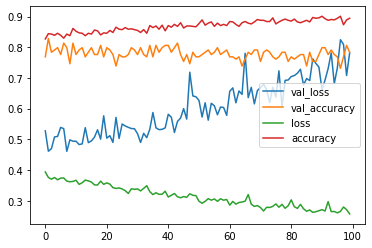

In [94]:
pd.DataFrame(model.history.history).plot()
plt.show()

In [95]:
pred = model.predict(X_test)